In [52]:
#from sklearn.datasets import make_blobs
import sklearn
#import numpy as np

X, y = sklearn.datasets.make_blobs(n_samples=10, centers=10,
                                   n_features=10, random_state=0)
#print "y: ", y
#print "X: ", X
X_scaled = sklearn.preprocessing.MinMaxScaler().fit_transform(X)
#print "y: ", y
#print "X: ", X_scaled

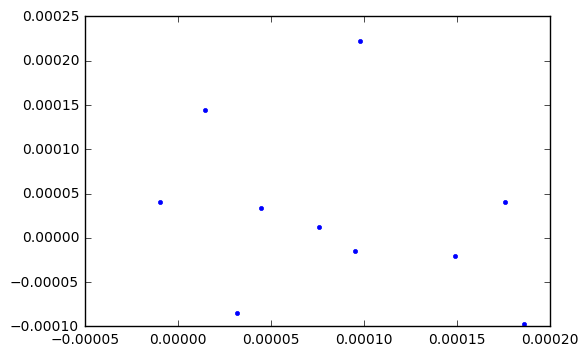

In [53]:
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(X_scaled) 
#print tsne
plt.plot(tsne[:,0], tsne[:,1], '.')

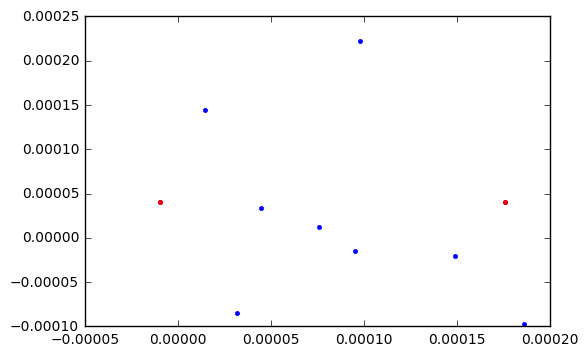

In [55]:
import numpy as np
from sklearn.neighbors import BallTree

tree = BallTree(X_scaled, leaf_size=2)

dist, ind = tree.query([X_scaled[0]], k=2) 

plt.plot(tsne[:,0], tsne[:,1], '.')
plt.plot(tsne[ind[0],0], tsne[ind[0],1], '.', color='r')

{"UID":320045,"personality":[0.283502558825,0.801817659327,0.0747544076824,0.666220427229,0.318682897177,0.287552044095,0.696518658114,0.0,0.771249137263,0.0]}
{"UID":244657,"personality":[1.0,0.87228399944,0.339648211155,0.832991648491,0.0743926544074,0.995118259431,0.135075221343,0.984388065489,0.515476749887,0.514188664126]}
{"UID":749280,"personality":[0.695245769944,0.666004526292,0.553758434624,1.0,0.114499752906,0.158497469883,0.0,1.0,0.741805774751,0.941429075347]}
{"UID":119957,"personality":[0.297381263123,0.363388223616,0.712807834938,0.0263075696455,0.859657801927,0.894466993478,0.222474880743,0.251803512377,0.149896058208,0.40285754108]}
{"UID":331294,"personality":[0.211130474861,0.550639870118,0.0,0.681234062184,0.68583461169,0.410513339189,0.599640417038,0.0331864278579,0.539063686477,1.0]}
{"UID":167589,"personality":[0.0,0.0,0.656013476385,0.0761354782621,0.425748550652,0.55798201634,1.0,0.17870876324,0.725014873924,0.0717875879035]}
{"UID":168086,"personality":[0.452

In [67]:
from __future__ import unicode_literals
from os.path import abspath, join, dirname
import random

FILES = {
    'first:male': './helper/name_gen/dist.male.first',
    'first:female': './helper/name_gen/dist.female.first',
    'last': './helper/name_gen/dist.all.last'
}


def get_name(filename):
    selected = random.random() * 90
    with open(filename) as name_file:
        for line in name_file:
            name, _, cummulative, _ = line.split()
            if float(cummulative) > selected:
                return name
    return ""  # Return empty string if file is empty


def get_first_name(gender=None):
    if gender is None:
        gender = random.choice(('male', 'female'))
    if gender not in ('male', 'female'):
        raise ValueError("Only 'male' and 'female' are supported as gender")
    return get_name(FILES['first:%s' % gender]).capitalize()


def get_last_name():
    return get_name(FILES['last']).capitalize()


def get_full_name(gender=None):
    return "{0} {1}".format(get_first_name(gender), get_last_name())

Fava
Debi


In [69]:
import random
import json

UID_amazon = random.sample(range(100000, 999999), len(X_scaled))
i=0
for line in X_scaled:
    txt = '{"UID":' + str(UID_amazon[i])
    txt += ',"Lastname":"' + str(get_last_name()) + '"'
    txt += ',"Firstname":"' + str(get_first_name()) + '"'
    txt += ',"personality":['
    for value in line:
        txt += str(value) + ','
    #txt += str(line) 
    txt = txt[:-1]
    txt += ']}'
    print txt
    with open('./data/user/U_' + str(UID_amazon[i]) + '.json', 'w') as f:
        f.write(txt)
        #json.dump(txt, f)
    i += 1

{"UID":745789,"Lastname":"Delara","Firstname":"David","personality":[0.283502558825,0.801817659327,0.0747544076824,0.666220427229,0.318682897177,0.287552044095,0.696518658114,0.0,0.771249137263,0.0]}
{"UID":954959,"Lastname":"Whitmore","Firstname":"Tony","personality":[1.0,0.87228399944,0.339648211155,0.832991648491,0.0743926544074,0.995118259431,0.135075221343,0.984388065489,0.515476749887,0.514188664126]}
{"UID":724830,"Lastname":"Phillips","Firstname":"Evelyn","personality":[0.695245769944,0.666004526292,0.553758434624,1.0,0.114499752906,0.158497469883,0.0,1.0,0.741805774751,0.941429075347]}
{"UID":217477,"Lastname":"Cavazos","Firstname":"Esther","personality":[0.297381263123,0.363388223616,0.712807834938,0.0263075696455,0.859657801927,0.894466993478,0.222474880743,0.251803512377,0.149896058208,0.40285754108]}
{"UID":684667,"Lastname":"Morabito","Firstname":"Nancy","personality":[0.211130474861,0.550639870118,0.0,0.681234062184,0.68583461169,0.410513339189,0.599640417038,0.033186427